In [65]:
#  We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.
#Load the dataset and explore the variables.
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
#Extract the target variable.
#Extract the independent variables and scale them.
#Build the logistic regression model.
#Evaluate the model.
#Even a simple model will give us more than 70% accuracy. Why?
#Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE

In [67]:
%matplotlib inline

In [68]:
pd.set_option('display.max_columns',None)

# Loading the data set and exploring the variables

In [69]:
df = pd.read_csv('customer_churn.csv')
display(df.head())



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df.shape

(7043, 21)

In [71]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL    

In [72]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [74]:
df['SeniorCitizen'].value_counts() #dummified categorical variable, we have many more no senior citizens than senior citizens. a

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [75]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [76]:
df['tenure'].nunique()

73

In [77]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [78]:
df['MonthlyCharges'].nunique()

1585

In [79]:
df['MonthlyCharges'].dtypes

dtype('float64')

In [80]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [81]:
df['Churn'].value_counts() #class imbalance, there are many more no than yes.


No     5174
Yes    1869
Name: Churn, dtype: int64

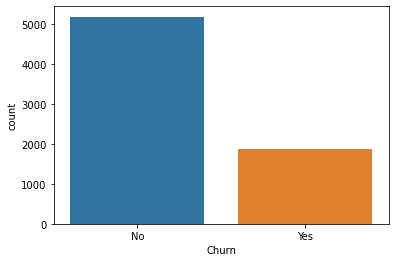

In [82]:
sns.countplot(x='Churn', data=df);
plt.show()

# Predicting Churn using a logistic regression 

In [83]:
df1 = df[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
df1.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [84]:
le = LabelEncoder() #No churn=0; churn=1
# Encode single column Churn
df1.Churn = le.fit_transform(df1.Churn)

C:\Users\31612\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [85]:
df1.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1


### Extracting the target variable

In [86]:
y = df1['Churn']

### Extracting the independent variables and scaling them

In [87]:
X = df1.drop('Churn',axis = 1)


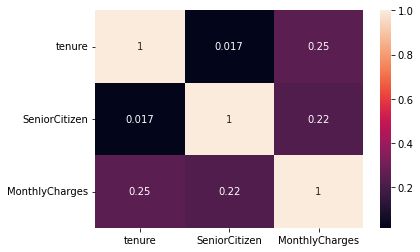

In [88]:
correlations_matrix = X.corr() #low correlation among the independent variables.
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [90]:
transformer = StandardScaler().fit(X_train)
X_train_Std = transformer.transform(X_train)

In [91]:
print(X_train_Std.shape)

(5282, 3)


In [92]:
pd.DataFrame(X_train_Std, columns=X_train.columns)

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427
...,...,...,...
5277,-0.707212,-0.435476,1.292341
5278,-0.911112,-0.435476,0.880297
5279,1.046330,-0.435476,-1.466853
5280,-1.278132,2.296336,0.167978


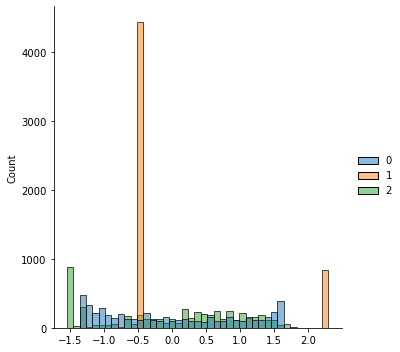

In [93]:
sns.displot(X_train_Std)

In [94]:
transformer = MinMaxScaler()
transformer.fit(X_train) 
X_train_scaled = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

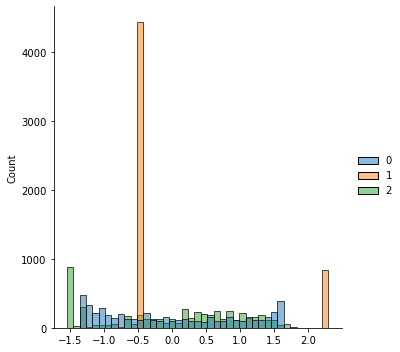

In [95]:
sns.displot(X_train_Std)

### Building the logistic regression model

In [96]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
multi_class='ovr')
classification.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [97]:
y_train_pred = classification.predict(X_train_scaled)

### Evaluating the model

In [98]:
transformer = StandardScaler().fit(X_test) #Applying the same transformation to the X_test than to the X_train.
X_test_Std = transformer.transform(X_test)

In [99]:
pd.DataFrame(X_test_Std, columns=X_test.columns)

,tenure,SeniorCitizen,MonthlyCharges
0,-0.545642,-0.453143,-0.220199
1,1.116633,-0.453143,1.698898
2,-0.788902,-0.453143,0.231643
3,-1.275422,-0.453143,-1.460712
4,0.913916,-0.453143,0.422238
...,...,...,...
1756,1.562609,-0.453143,0.604618
1757,-0.829445,-0.453143,-1.493573
1758,0.630113,-0.453143,-1.475499
1759,1.562609,-0.453143,0.721276


In [100]:
y_test_pred  = classification.predict(X_test_Std) #Checking how the model predicts in the test sample, using numbers it has not yet seen. 

C:\Users\31612\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [101]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

The confusion matrix on the TRAIN set is: 


array([[3539,  337],
       [ 753,  653]], dtype=int64)

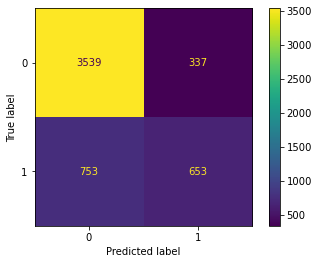

In [102]:
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

In [103]:
#In the train set:
#The model has predicted correctly that 3539 customers would not leave (true negatives).
#It has predicted that 753 clients stayed while in reality they left (false negatives). 
#It has predicted correctly that 653 clients left (true positives).
#It has predicted that 337 customers left while they stayed in reality (false positives).

The confusion matrix on the TEST set is: 


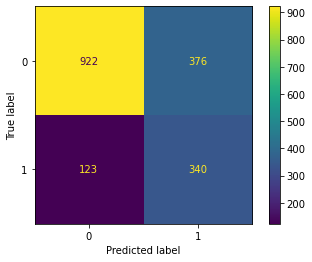

In [104]:
print("The confusion matrix on the TEST set is: ")
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

In [105]:
#In the test set:
#The model has predicted correctly that 922 customers would not leave (true negatives). 
#It has predicted that 123 clients stayed while in reality they left (false negatives). TYPE II Error.
#It has predicted correctly that 340 clients left (true positives).
#It has predicted that 376 customers left while they stayed in reality (false positives).TYPE I Error.

In [108]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy in the TRAIN set is: 0.794
The accuracy in the TEST  set is: 0.717


In [109]:
#Even a simple model will give us more than 70% accuracy. Why?
# Accuracy measures the performance of the model by calculating the ratio of correct predictions over total predictions.
# When the data are imbalanced towards one of the categories we are predicting, 
#accuracy is not taking into account that the probability of one of the categories is much higher than the probability of the other. 
#If we take accuracy as the only measure of the performance of our model, we can reach misleading conclusions. 


In [110]:
print("The precision in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label=0)))
print("The precision in the TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred, pos_label=0)))

The precision in the TRAIN set is: 0.825
The precision in the TEST  set is: 0.882


In [113]:
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label=0)))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label=0)))

The recall in the TRAIN set is: 0.913
The recall in the TEST  set is: 0.710


In [114]:
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label=0)))

The F1-score for the TRAIN set is 0.87


In [115]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      3876
           1       0.66      0.46      0.55      1406

    accuracy                           0.79      5282
   macro avg       0.74      0.69      0.71      5282
weighted avg       0.78      0.79      0.78      5282



In [100]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1298
           1       0.64      0.42      0.51       463

    accuracy                           0.79      1761
   macro avg       0.73      0.67      0.69      1761
weighted avg       0.77      0.79      0.77      1761



In [117]:
print("The kappa score in the TRAIN set is: {:.3f}".format(cohen_kappa_score(y_train, y_train_pred)))
print("The kappa score in the TEST  set is: {:.3f}".format(cohen_kappa_score(y_test,  y_test_pred)))

The kappa score in the TRAIN set is: 0.417
The kappa score in the TEST  set is: 0.378


In [ ]:
#The kappa score takes into account the class imbalance in the data that we fed the model.
#In this case, the kappa score is very low showing us the sample is biaised towards the customers that are loyal to the company, 
#while we want to be able to predict the clients that will leave the company (the false negative, or error type II). 

In [ ]:
#The model is good at predicting clients that are staying with the company. 
#It is not good predicting clients that can potentially leave as the sample is biaised towards the customers that are staying. 
#If we are trying to identify clients to design a retaining policy, this model will not be appropriate.
#If we want our model to identify the customers that can churn, then we are interested to train our model to identify YES or 1. 
#Perhaps in this case dowsizing is the adequate correction for the class imbalance (thowgh we may then face a problem of not having enough observations). 




### Applying imblearn.over_sampling.SMOTE to the dataset

In [123]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_Std,y_train)

print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7752, 3)


The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.57
The kappa score in the TRAIN set is: 0.417
The kappa score in the TEST  set is: 0.378


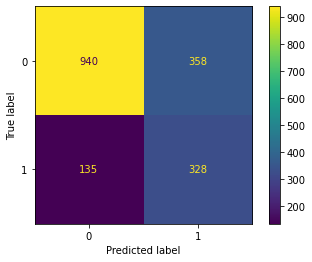

In [124]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_Std)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The kappa score in the TRAIN set is: {:.3f}".format(cohen_kappa_score(y_train, y_train_pred)))
print("The kappa score in the TEST  set is: {:.3f}".format(cohen_kappa_score(y_test,  y_test_pred)))

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
#After the transformation, the number of error type II increased and all the measures of performance decreased, except the kappa, that remained very low. 